In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('AirPassengers.csv')

In [6]:
df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA

In [12]:
#EDA on the time series data
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
#Passengers,144.0,280.298611,119.966317,104.0,180.0,265.5,360.5,622.0


In [16]:
df.info

<bound method DataFrame.info of        Month  #Passengers
0    1949-01          112
1    1949-02          118
2    1949-03          132
3    1949-04          129
4    1949-05          121
..       ...          ...
139  1960-08          606
140  1960-09          508
141  1960-10          461
142  1960-11          390
143  1960-12          432

[144 rows x 2 columns]>

In [18]:
df['Month'] = pd.to_datetime(df['Month'])
df.index = df['Month']
del df['Month']

In [22]:
df.info

<bound method DataFrame.info of             #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121
...                 ...
1960-08-01          606
1960-09-01          508
1960-10-01          461
1960-11-01          390
1960-12-01          432

[144 rows x 1 columns]>

<Axes: xlabel='Month'>

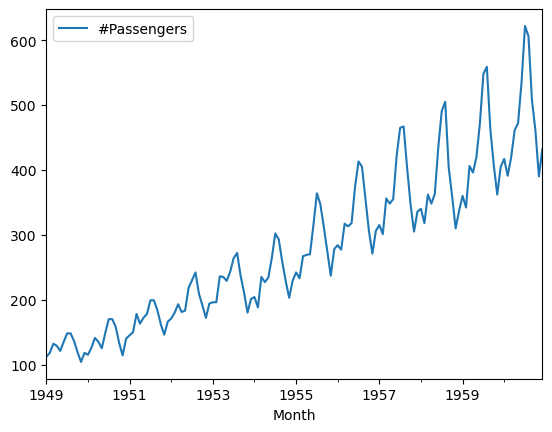

In [26]:
#plotting the time series
df.plot()

Text(0.5, 1.0, 'Rolling Mean & Standard Deviation (Logarithmic Scale)')

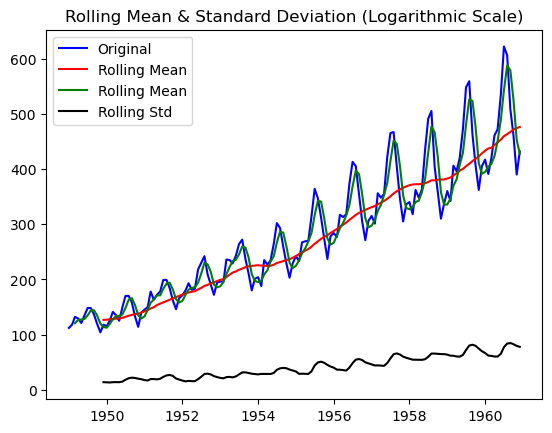

In [28]:
mean_log = df.rolling(window=12).mean()
mean_log2 = df.rolling(window=3).mean()
std_log = df.rolling(window=12).std()

plt.plot(df, color='blue', label='Original')
plt.plot(mean_log, color='red', label='Rolling Mean')
plt.plot(mean_log2, color='green', label='Rolling Mean')
plt.plot(std_log, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation (Logarithmic Scale)')

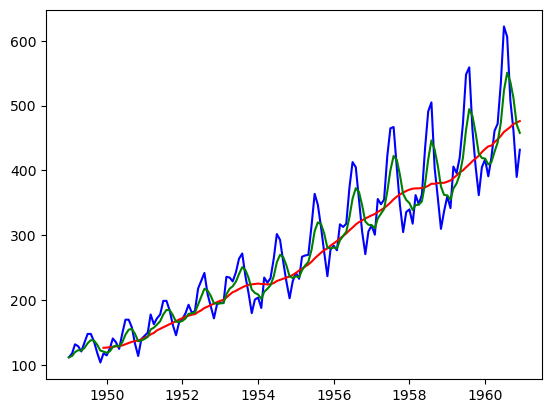

In [32]:
MA = df.rolling(window=12).mean()
EMA = df.ewm(span=5, adjust=False).mean()

plt.plot(df, color='blue', label='Original')
plt.plot(MA, color='red', label='Rolling Mean')
plt.plot(EMA, color='green', label='Span')

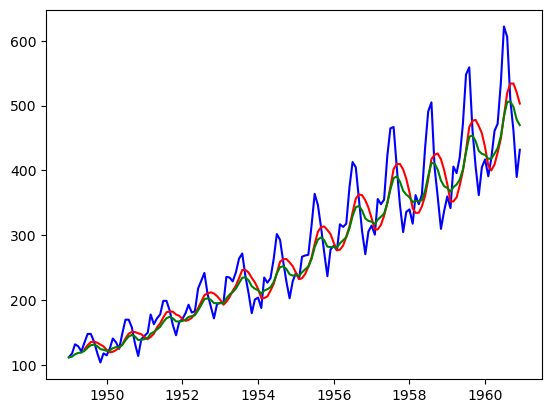

In [34]:
MA = df.rolling(window=6).mean()
EMA = df.ewm(span=10, adjust=False).mean()

plt.plot(df, color='blue', label='Original')
plt.plot(MA, color='red', label='Rolling Mean')
plt.plot(EMA, color='green', label='Span')

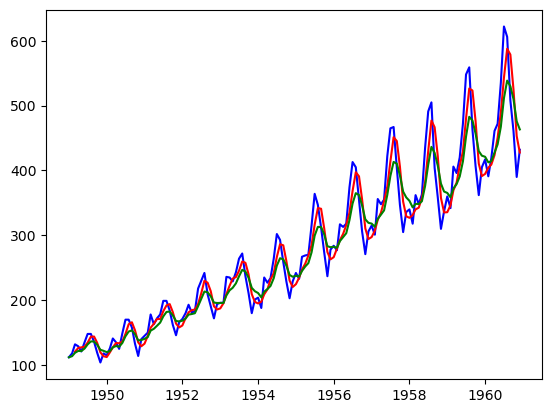

In [36]:
MA = df.rolling(window=3).mean()
EMA = df.ewm(span=6, adjust=False).mean()

plt.plot(df, color='blue', label='Original')
plt.plot(MA, color='red', label='Rolling Mean')
plt.plot(EMA, color='green', label='Span')

In [38]:
span =5
a = 2/(span+1)
a

0.3333333333333333

In [42]:
## Exponential
ewm = df.ewm(span=5, adjust=False).mean()

In [46]:
#checking the stationarity of the series
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['#Passengers'])
print(result)

(0.8153688792060547, 0.9918802434376411, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 996.692930839019)


In [48]:
adf_df = df['#Passengers']

In [50]:
### IGNORE - Mentor's Comments ----
dftest = adfuller(adf_df)
dfout = pd.Series(dftest[0:4],index=['ADF test statistic','p-value','# lags used','# observations'])

for key,val in dftest[4].items():
    dfout[f'critical value ({key})']=val
print(dfout)

ADF test statistic        0.815369
p-value                   0.991880
# lags used              13.000000
# observations          130.000000
critical value (1%)      -3.481682
critical value (5%)      -2.884042
critical value (10%)     -2.578770
dtype: float64


In [52]:
#**Data is Non Stationary**

<Axes: xlabel='Month'>

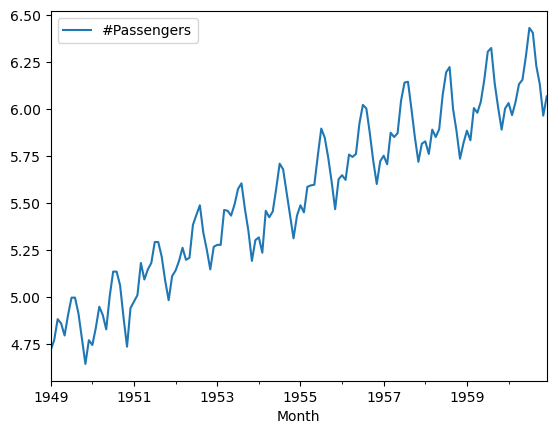

In [54]:
#logrithmic comutation to make the time series stationary
first_log = np.log(df) # Large values are compressed, small values are less affected.
first_log = first_log.dropna()
## np.log() of 0 or negative numbers is undefined → results in NaN.
## dropna() removes these NaNs to avoid errors in plotting or modeling.

first_log.plot()

Text(0.5, 1.0, 'Rolling Mean & Standard Deviation (Logarithmic Scale)')

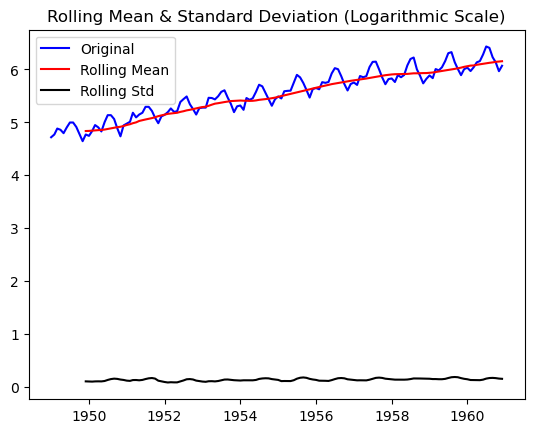

In [56]:
mean_log = first_log.rolling(window=12).mean()
std_log = first_log.rolling(window=12).std()

plt.plot(first_log, color='blue', label='Original')
plt.plot(mean_log, color='red', label='Rolling Mean')
plt.plot(std_log, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation (Logarithmic Scale)')

In [60]:
## Removing Trend (Mean Subtraction)
## This is one way to make a series stationary.
new_df = first_log - mean_log
new_df = new_df.dropna()
new_df.head()


,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142


In [62]:
#adfuller test for stationarity
result = adfuller(new_df['#Passengers'])
print(result)

(-3.162907991300876, 0.022234630001242695, 13, 119, {'1%': -3.4865346059036564, '5%': -2.8861509858476264, '10%': -2.579896092790057}, -436.63269481747034)


Text(0.5, 1.0, 'Rolling Mean & Standard Deviation (Logarithmic Scale)')

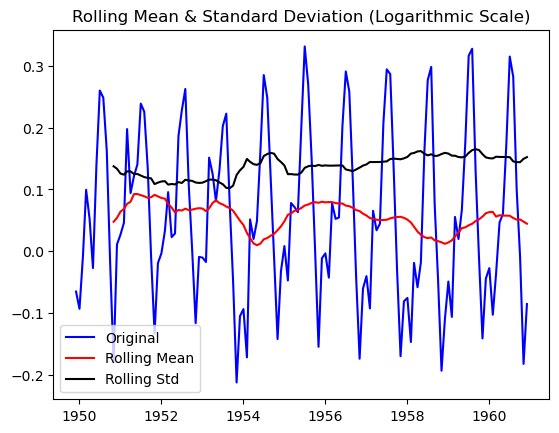

In [64]:
mean_log = new_df.rolling(window=12).mean()
std_log = new_df.rolling(window=12).std()

plt.plot(new_df, color='blue', label='Original')
plt.plot(mean_log, color='red', label='Rolling Mean')
plt.plot(std_log, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation (Logarithmic Scale)')

In [66]:
result = adfuller(new_df['#Passengers'])
print(result)

(-3.162907991300876, 0.022234630001242695, 13, 119, {'1%': -3.4865346059036564, '5%': -2.8861509858476264, '10%': -2.579896092790057}, -436.63269481747034)


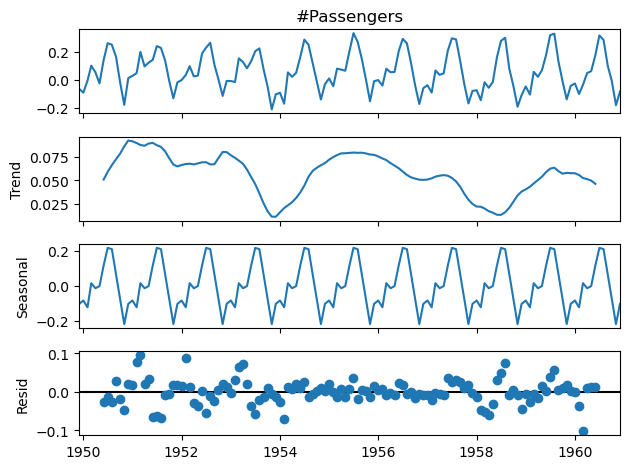

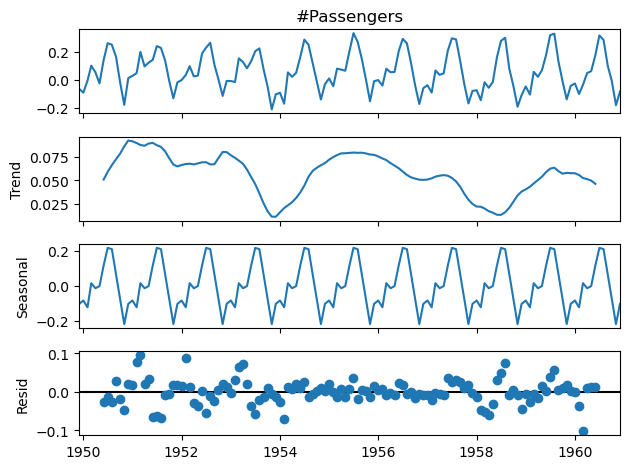

In [68]:
#seasonal Decompose
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_result = seasonal_decompose(new_df['#Passengers'].dropna())

decompose_result.plot()

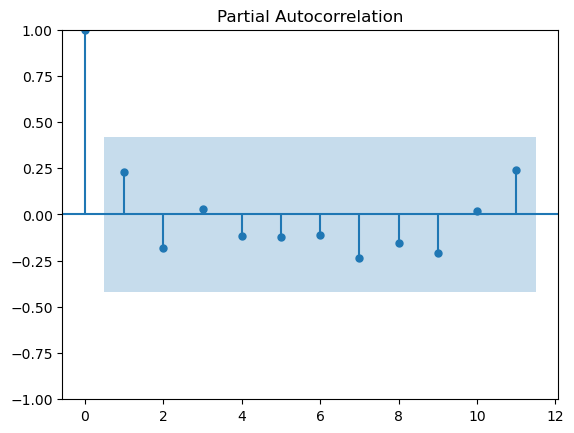

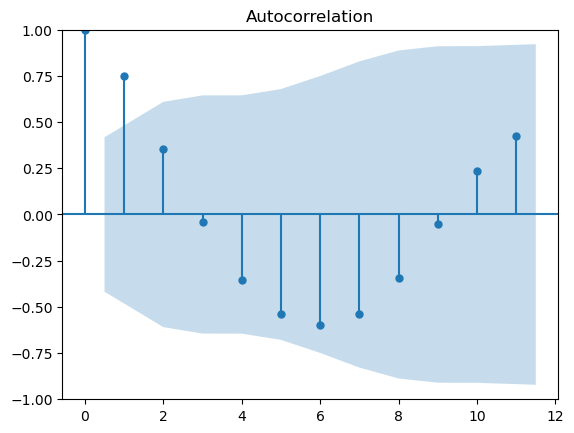

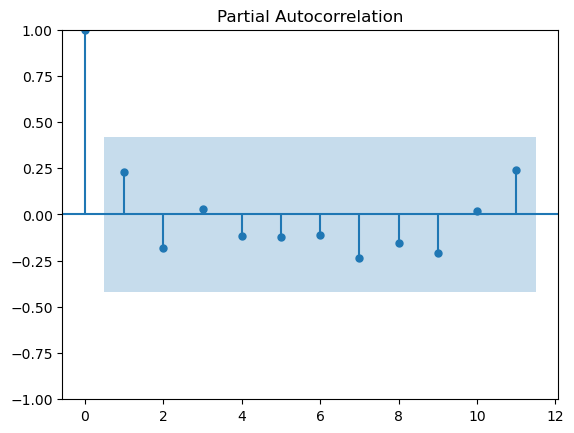

In [70]:
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
acf_plot=acf(new_df)
pacf_plot=pacf(new_df)
plot_acf(acf_plot)
plot_pacf(pacf_plot)

In [72]:
from statsmodels.tsa.arima_model import ARIMA

train = new_df.iloc[:120]['#Passengers']
test = new_df.iloc[121:]['#Passengers']

model = ARIMA(train, order=(1,0,2))
model_fit = model.fit()
model_fit.summary()

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


In [74]:
new_df['predict'] = model_fit.predict(start= len(train),
                                    end=len(train)+len(test)- 1,
                                    dynamic=True)
new_df[['#Passengers','predict']].plot()

NameError: name 'model_fit' is not defined

In [76]:
from statsmodels.tsa.statespace.sarimax import SARIMAX, SARIMAXResults

model = SARIMAX(train, order=(1,0,2), seasonal_order=(1,0,2,12))
model = model.fit()

C:\Users\cprad\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\cprad\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\cprad\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\cprad\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Axes: xlabel='Month'>

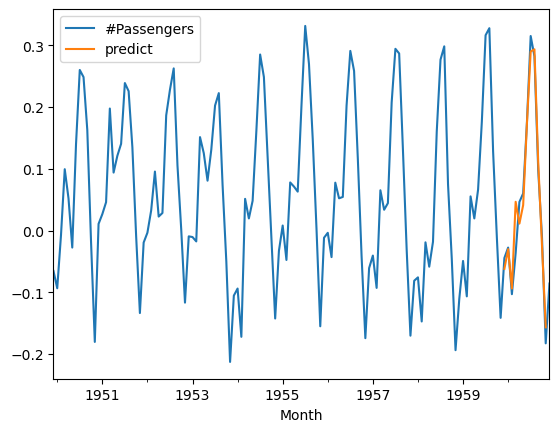

In [78]:
new_df['predict'] = model.predict(start= len(train) ,
                                                       end=len(train)+len(test)- 1,
                                                       dynamic=True)
new_df[['#Passengers','predict']].plot()

<Axes: xlabel='Month'>

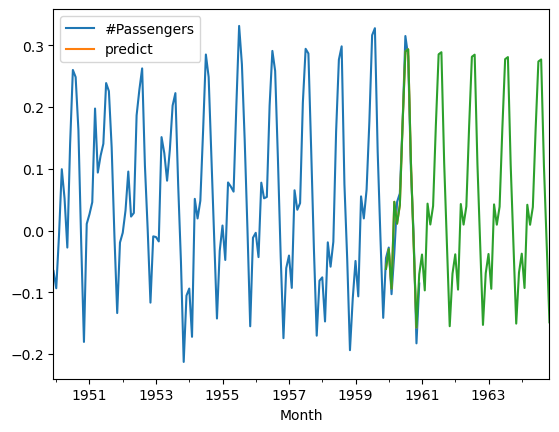

In [80]:
#predicting the projections for the next 5 years
forecast = model.forecast(steps=60)
new_df.plot()
forecast.plot()